In [1]:
print("hello world")

hello world


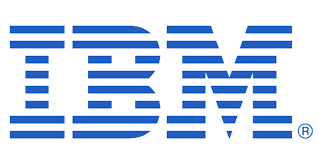

In [2]:
from IPython.display import Image
Image("image-logo.png")

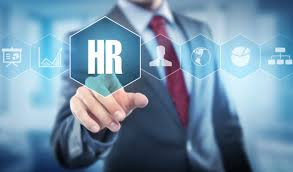

In [3]:
Image("image-hr.jpg")


# 1. Exploratory data analysis

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv(r'Employee-Attrition.csv')


In [6]:
from matplotlib import style
 
#style.use('fivethirtyeight')
#sns.set(style='whitegrid',color_codes=True)



In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.shape

(1470, 35)

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
import missingno as msno

<Axes: >

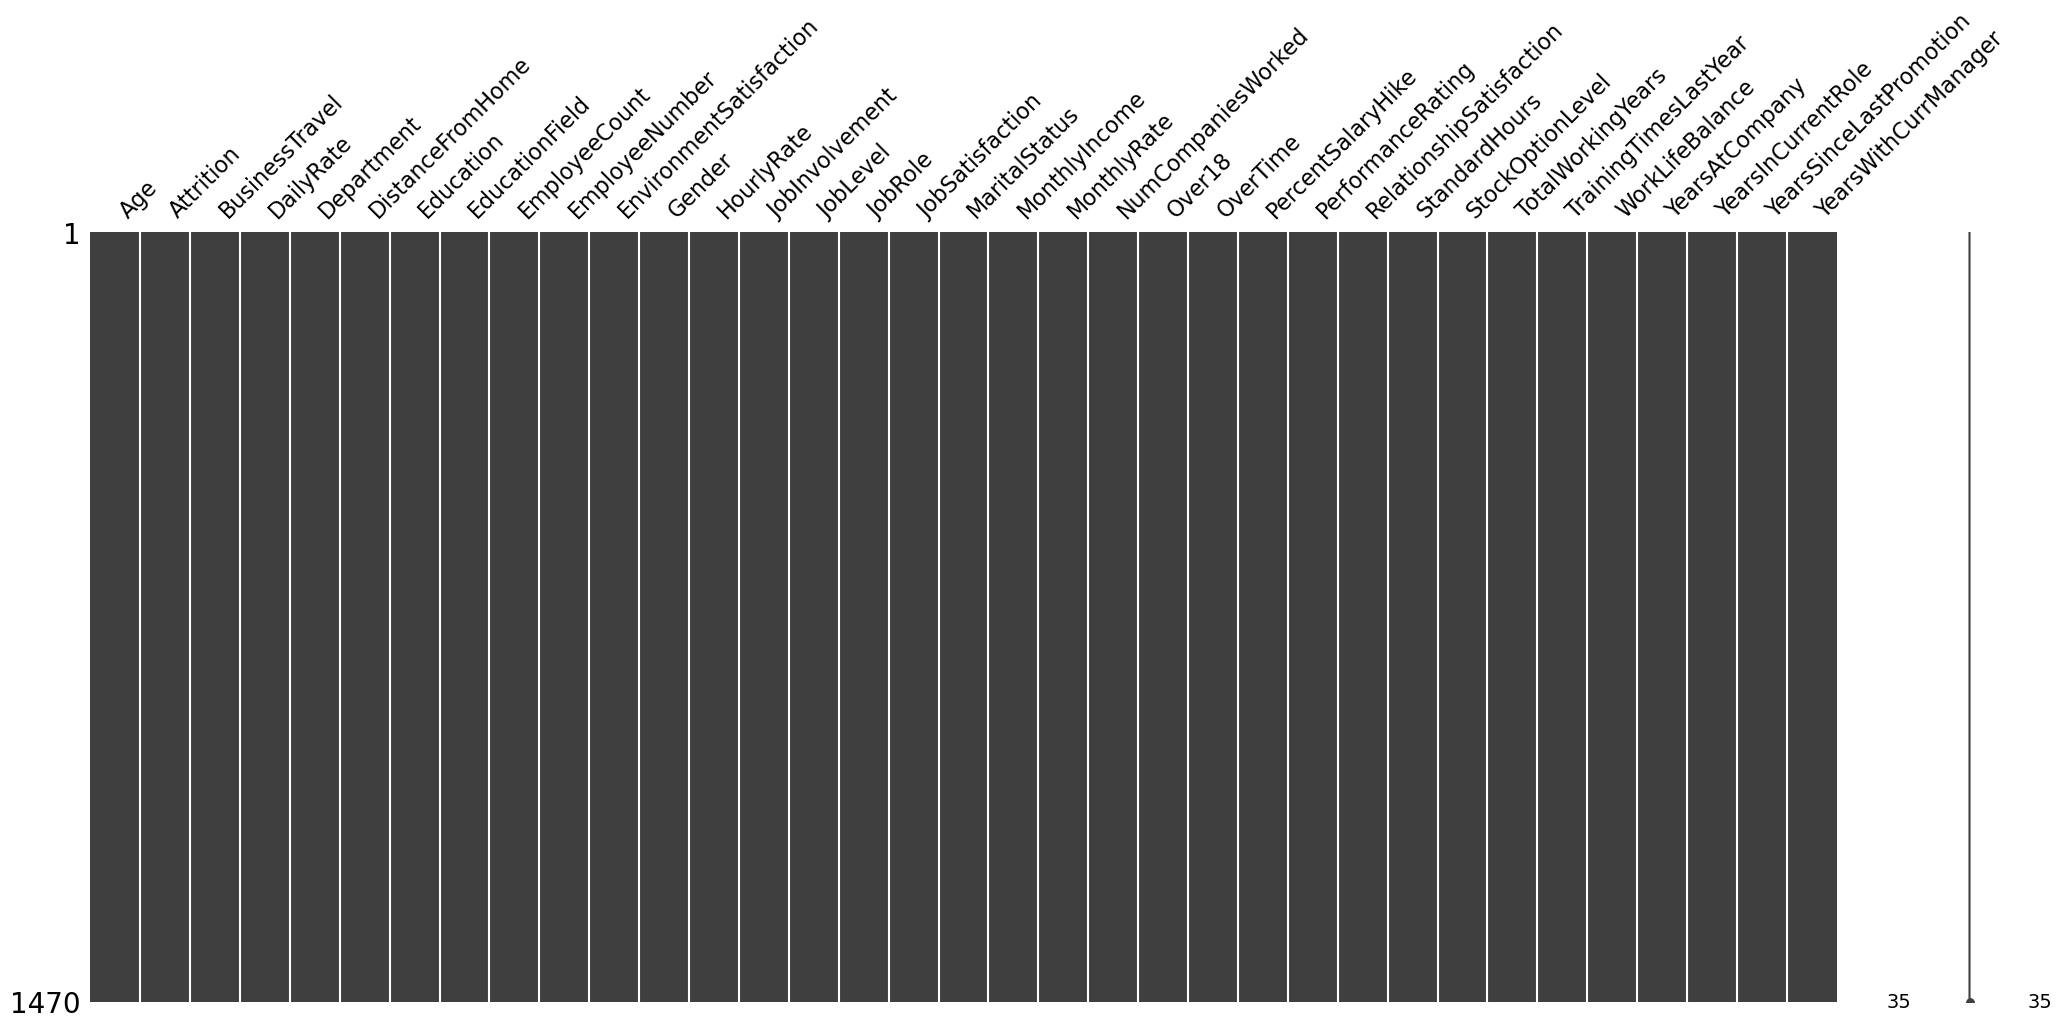

In [13]:
msno.matrix(df)

# Binary classification problem

In [14]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


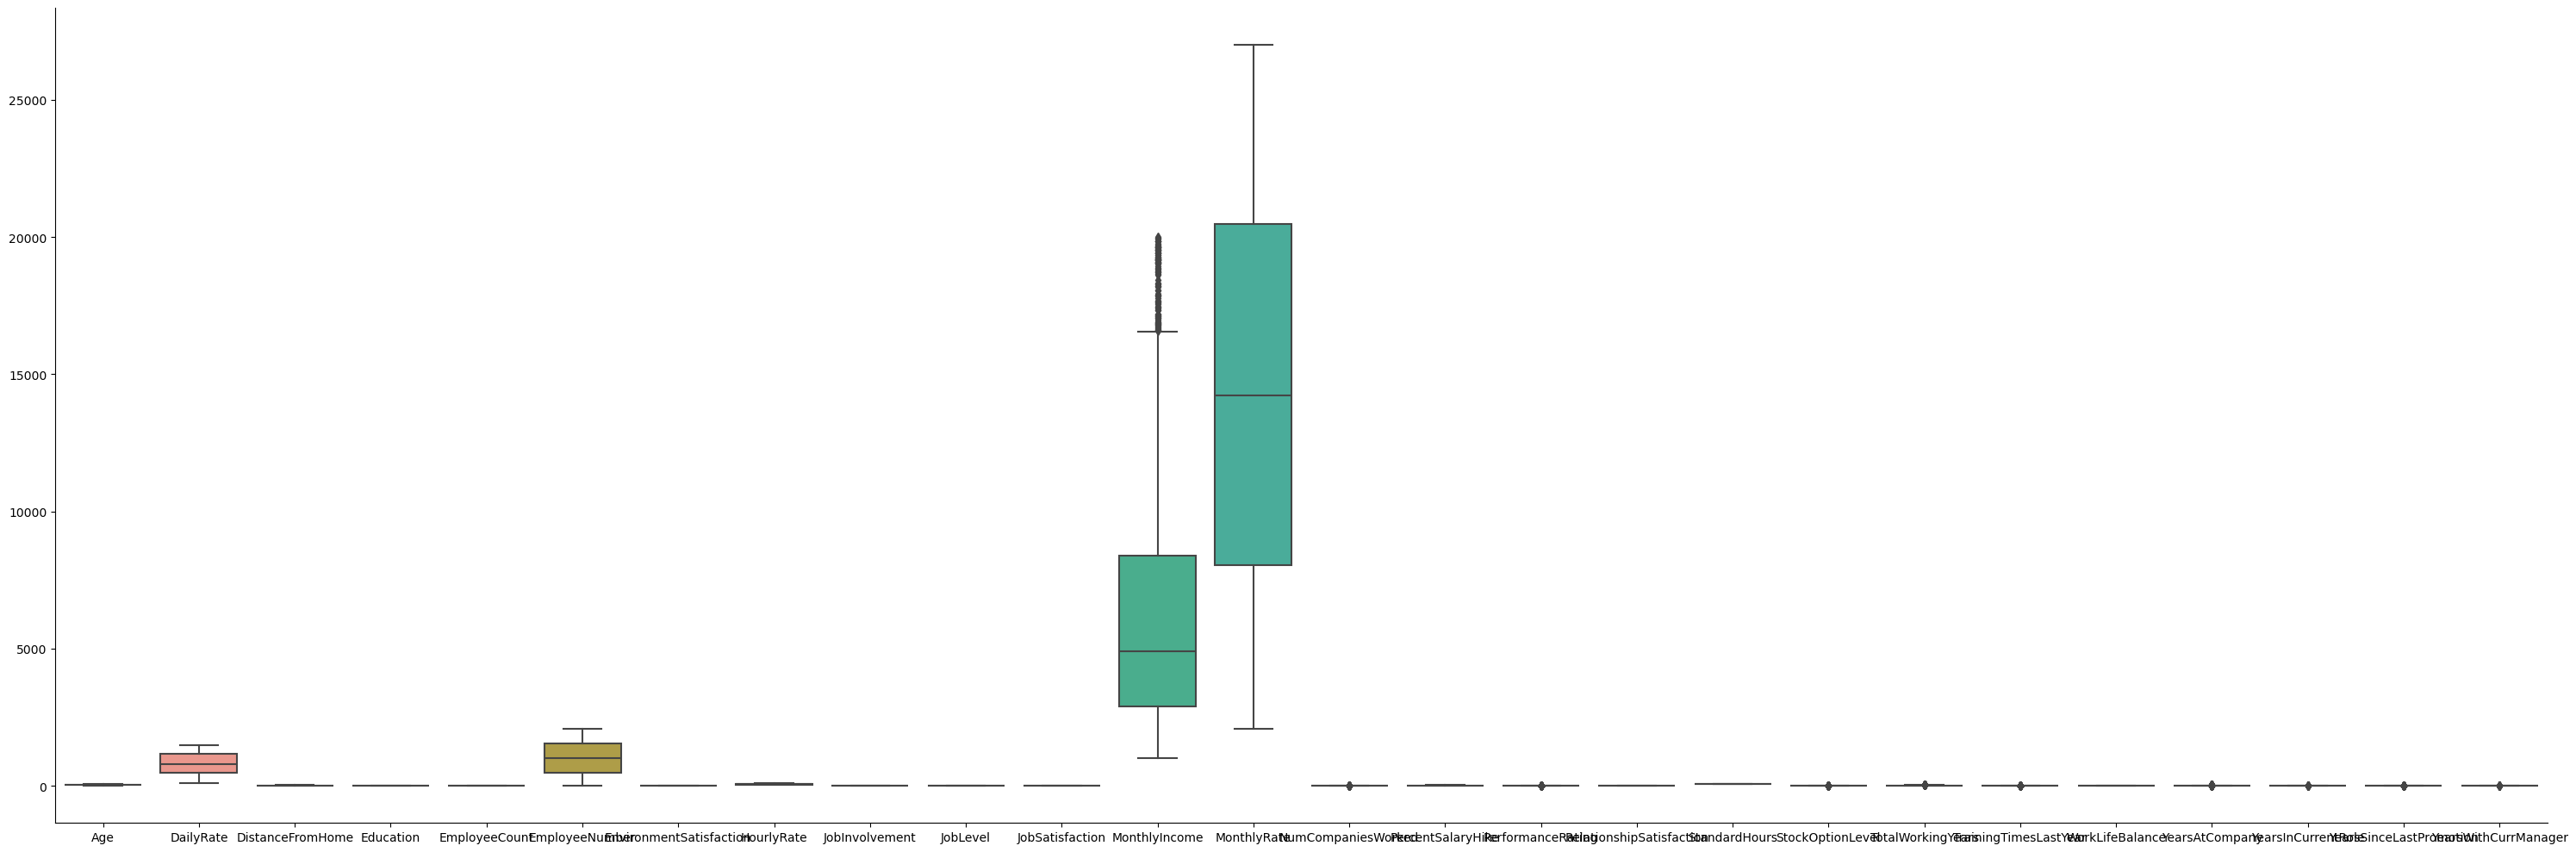

In [15]:
sns.catplot(data=df,kind='box',height=10,aspect=3)


C:\Users\Rehaan\AppData\Local\Temp\ipykernel_12868\3763831077.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'],shade=True,color='#ff4125')
C:\Users\Rehaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

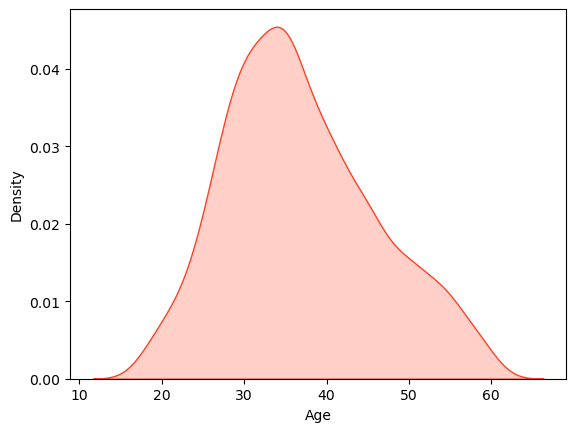

In [16]:
sns.kdeplot(df['Age'],shade=True,color='#ff4125')


C:\Users\Rehaan\AppData\Local\Temp\ipykernel_12868\2872108529.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\Rehaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

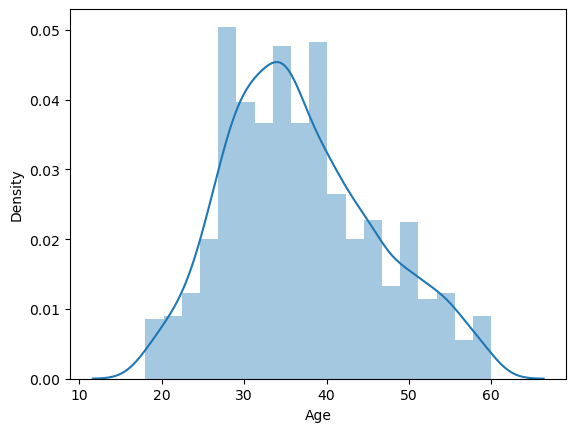

In [17]:
sns.distplot(df['Age'])


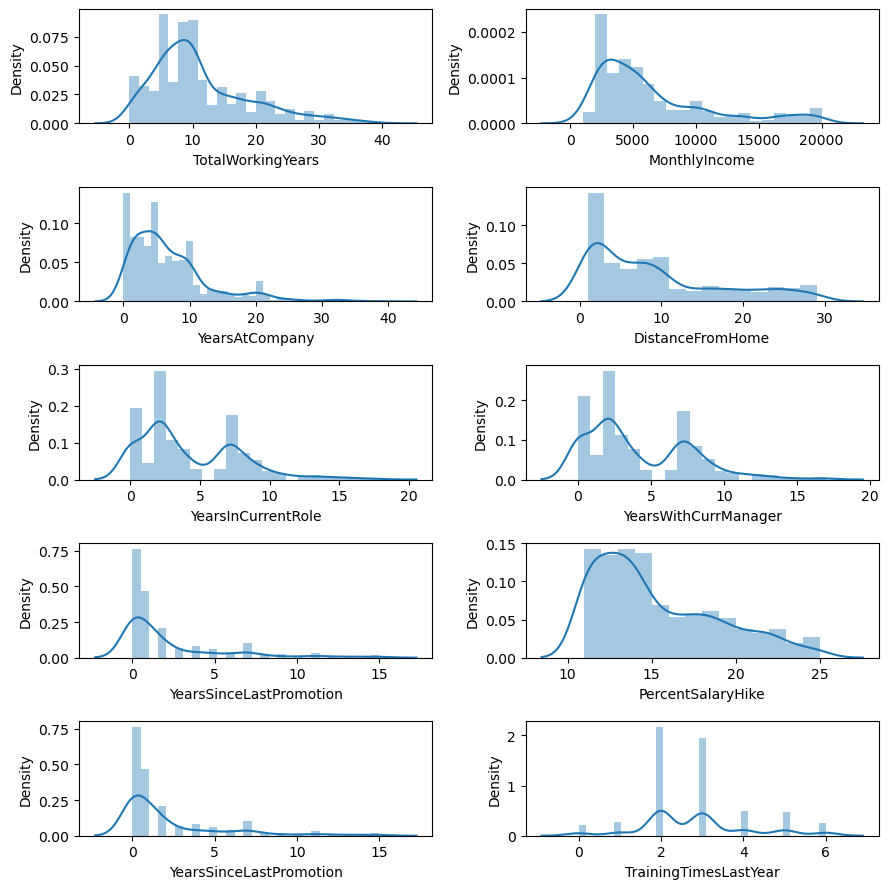

In [18]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

In [19]:
cat_df=df.select_dtypes(include='object')


In [20]:
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [21]:
def plot_cat(attr, labels=None):
    sns.catplot(data=df, kind='count', height=5, aspect=3, x=attr, hue=labels)
    return

    sns.catplot(data=df, kind='count', height=5, aspect=1.5, x=attr)


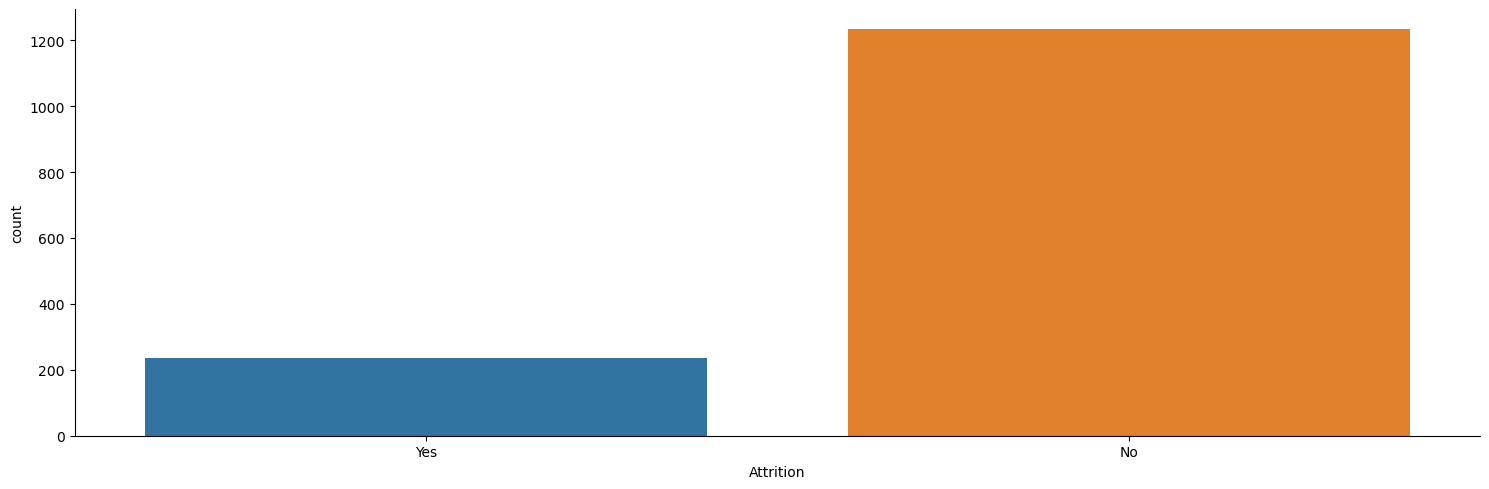

In [22]:
plot_cat('Attrition')   


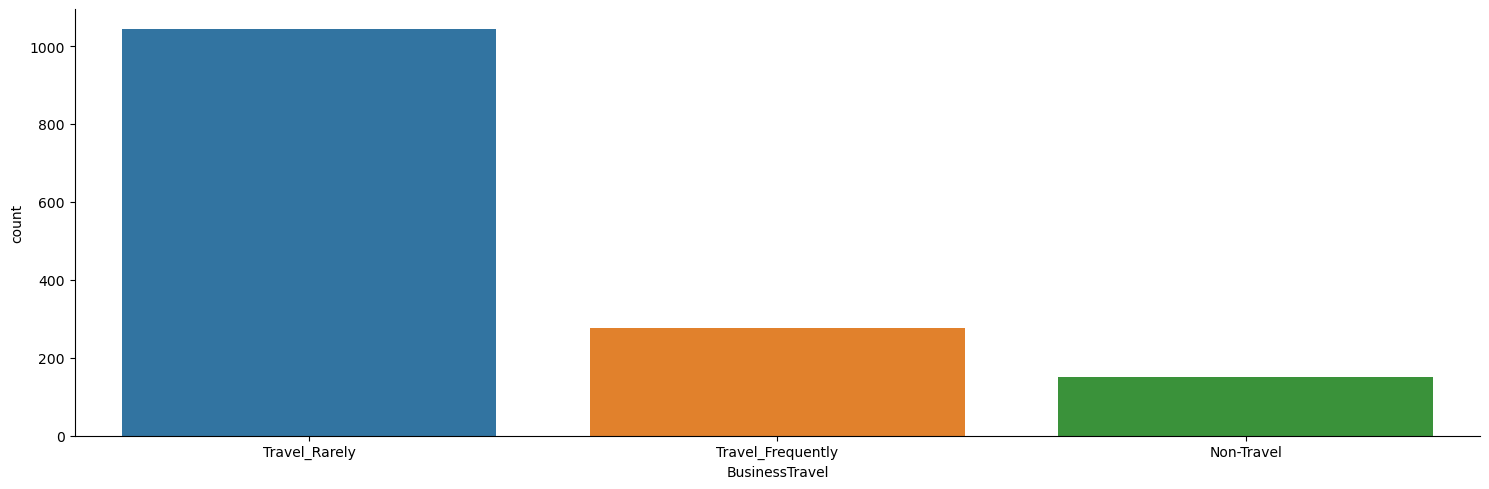

In [23]:
plot_cat('BusinessTravel')   


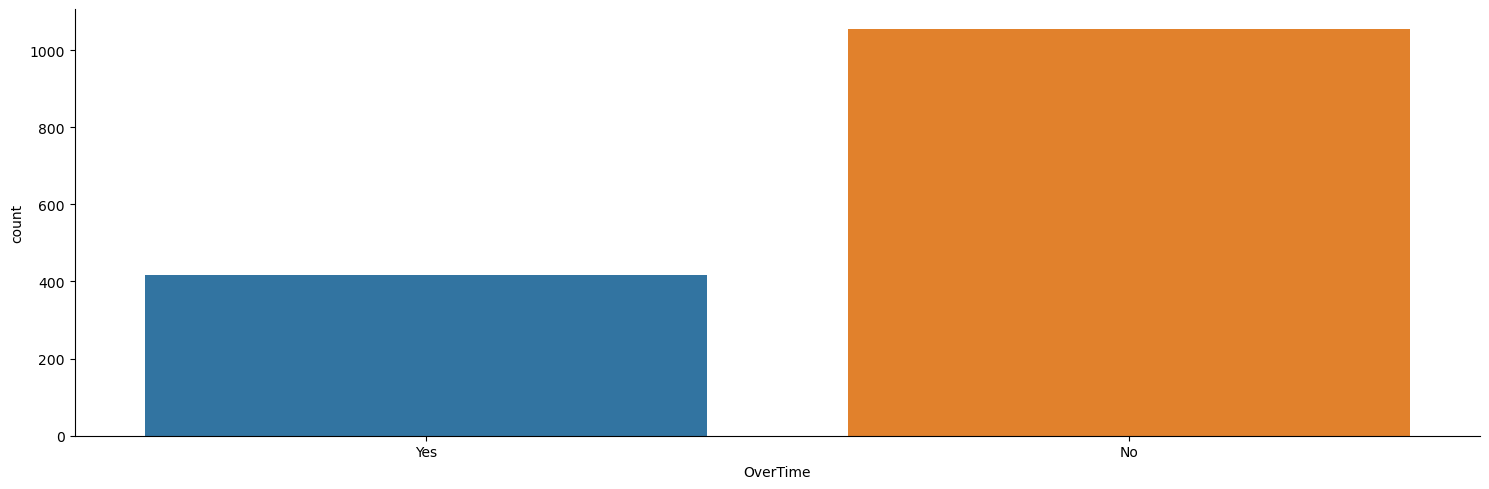

In [24]:
plot_cat('OverTime')


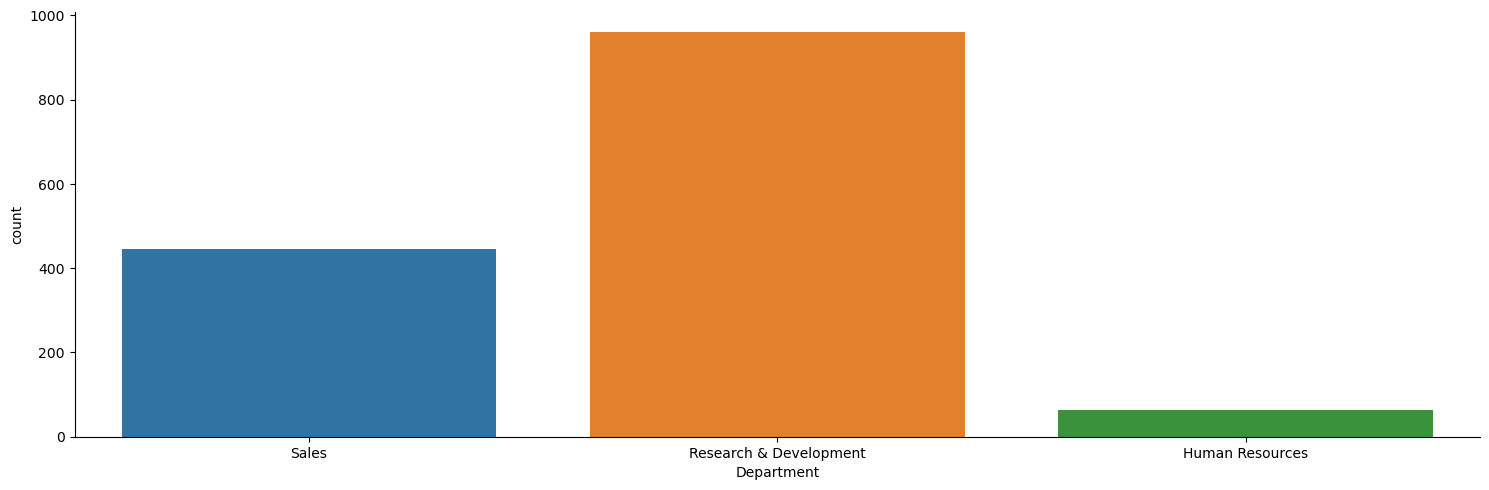

In [25]:
plot_cat('Department')   


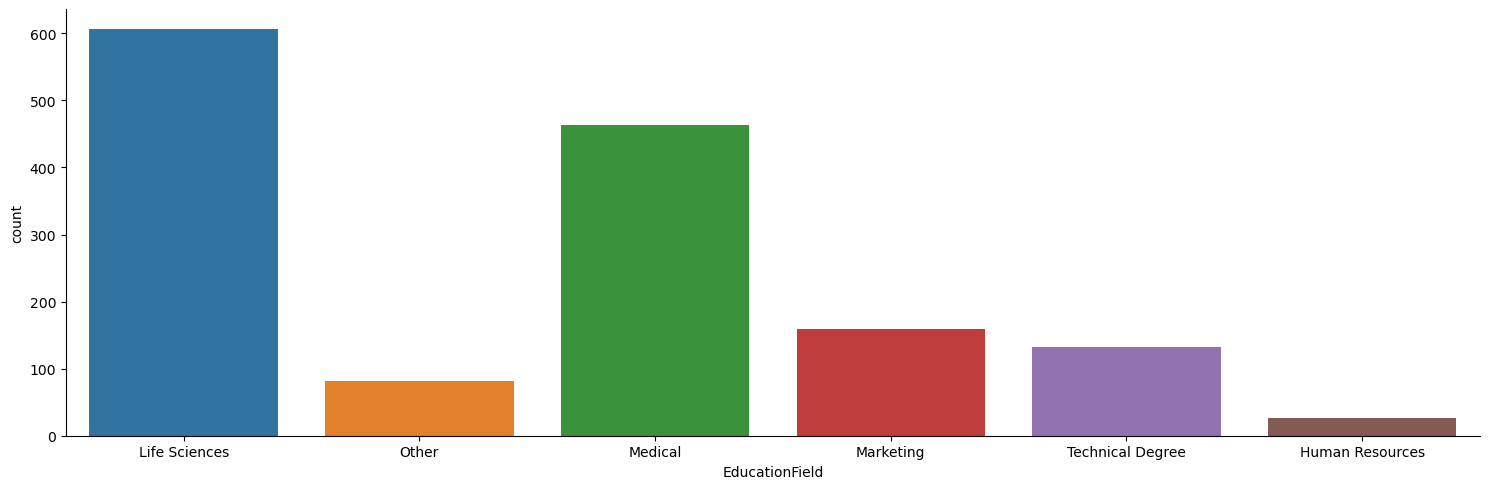

In [26]:
plot_cat('EducationField')


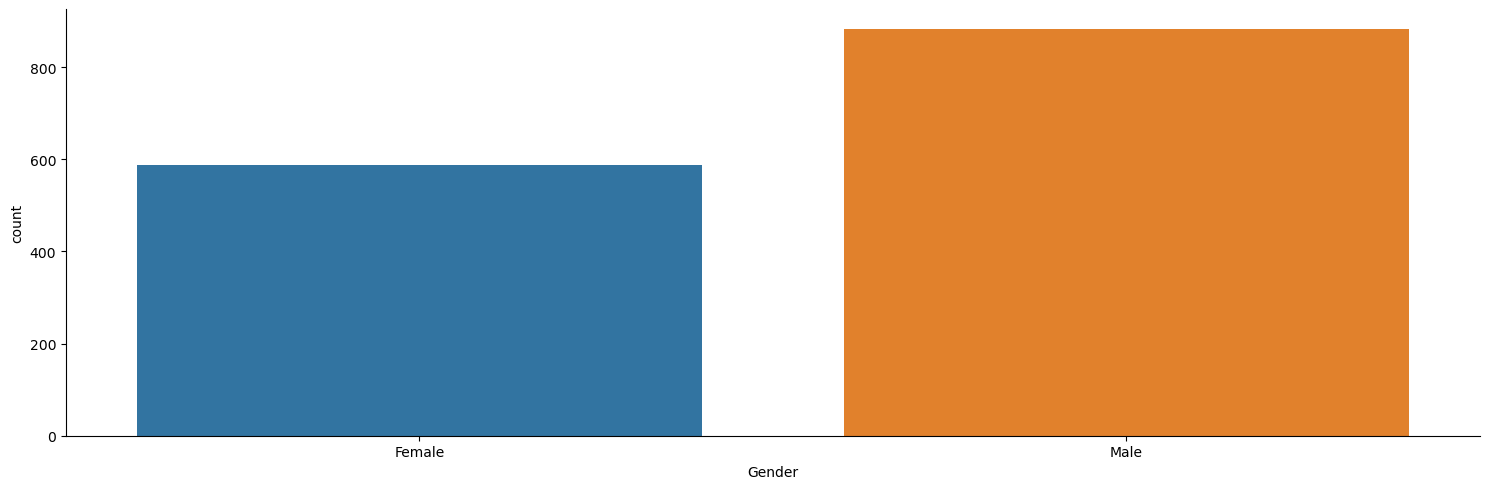

In [27]:
plot_cat('Gender') 


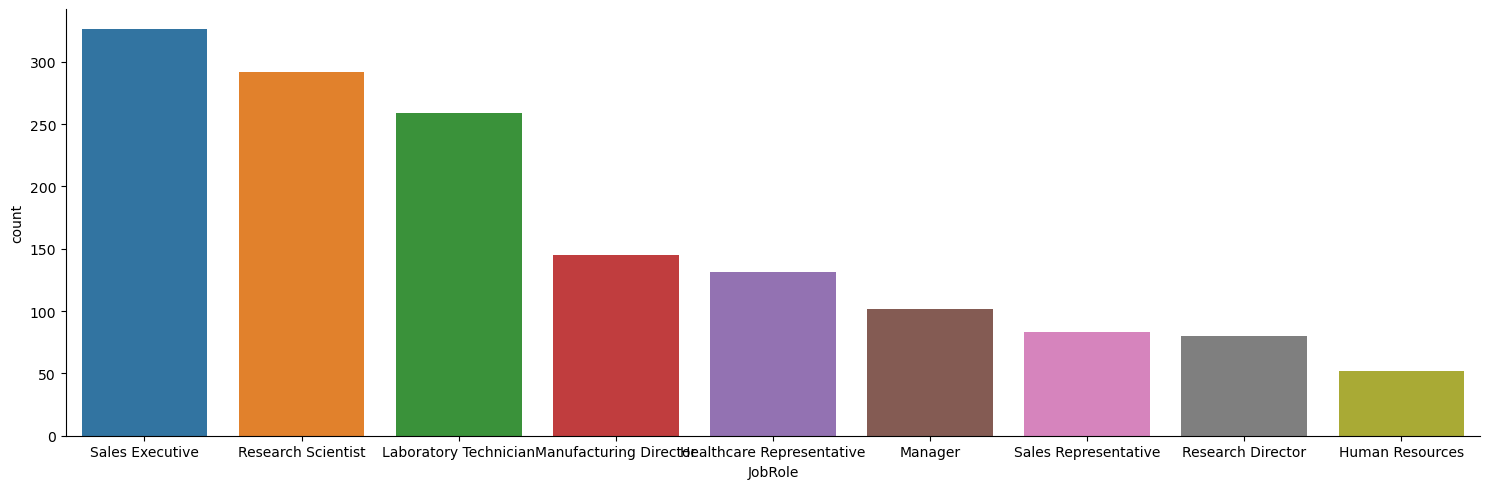

In [28]:
plot_cat('JobRole')   


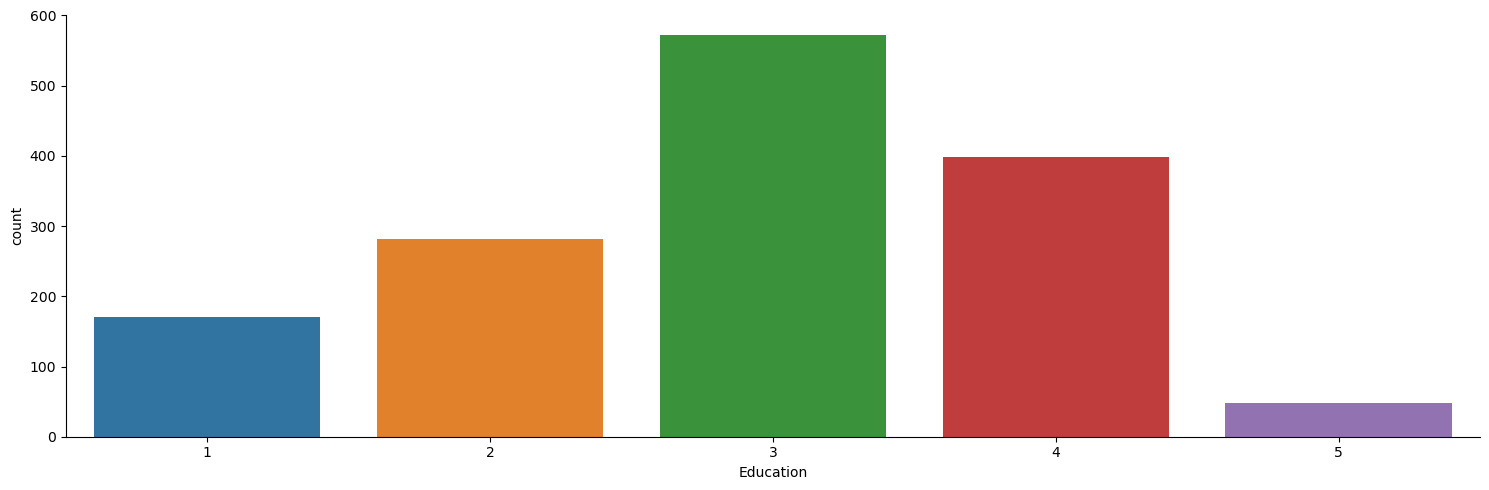

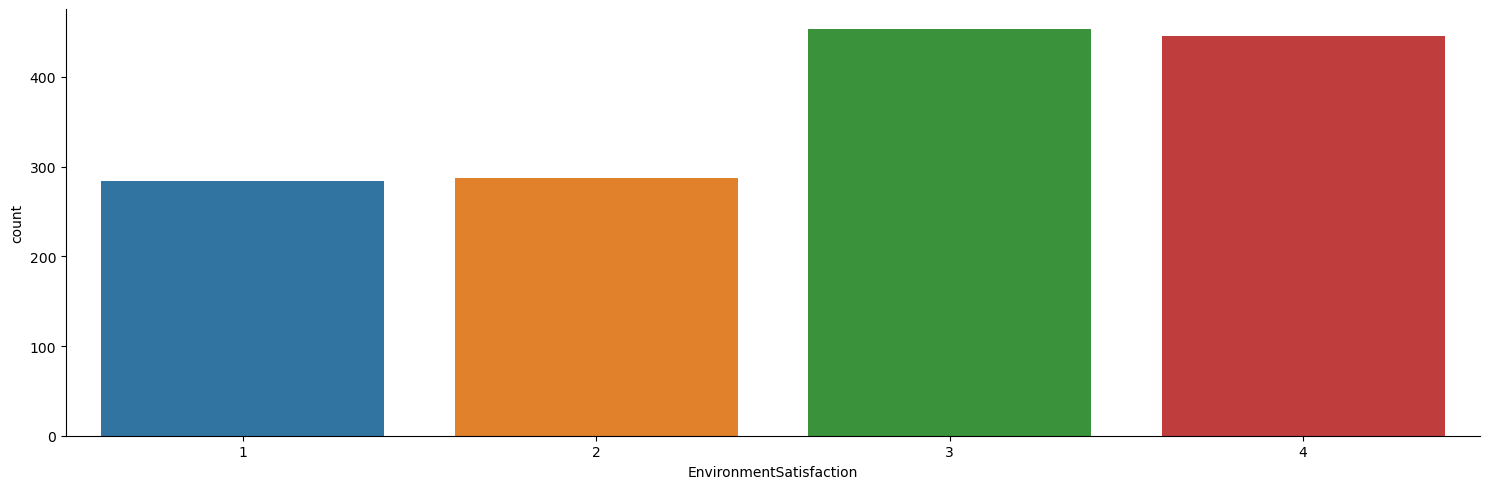

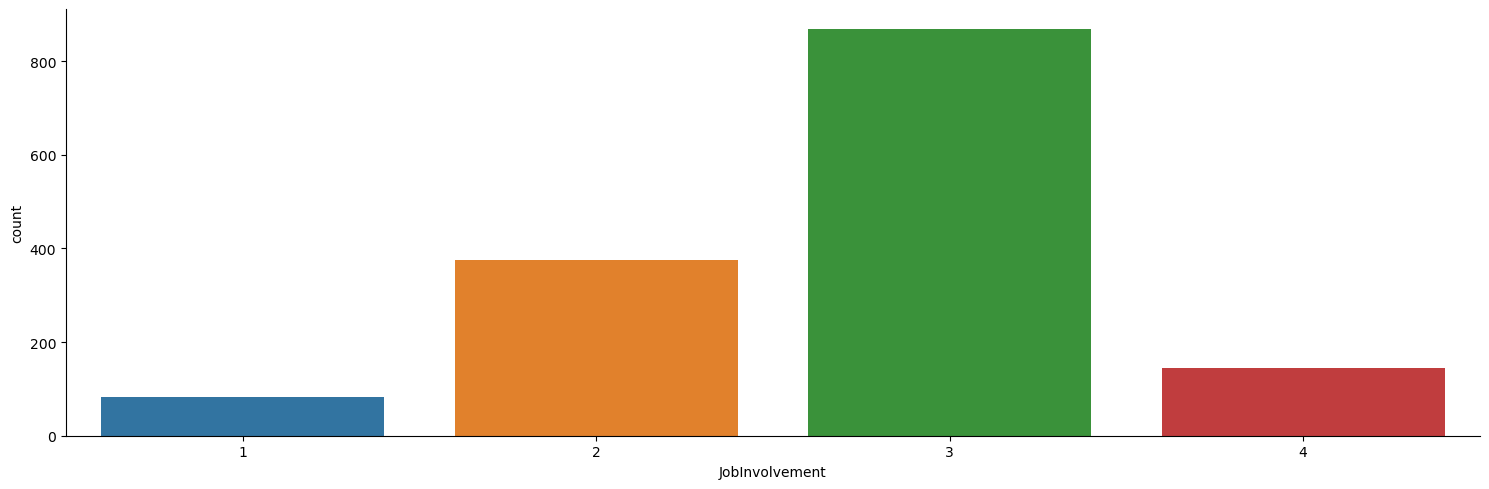

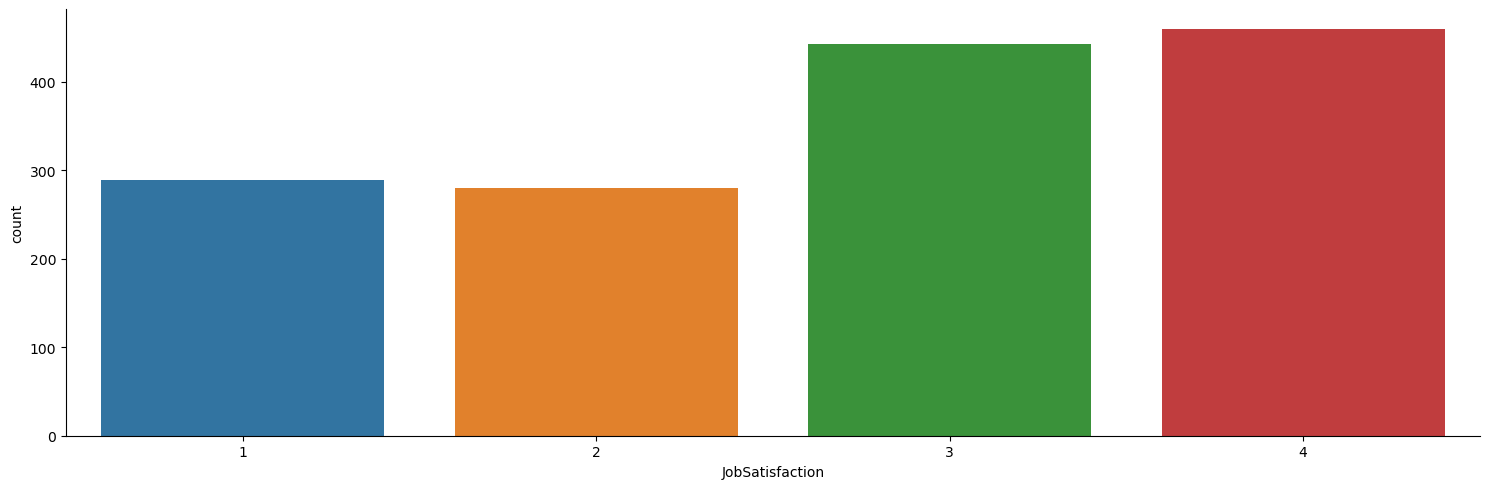

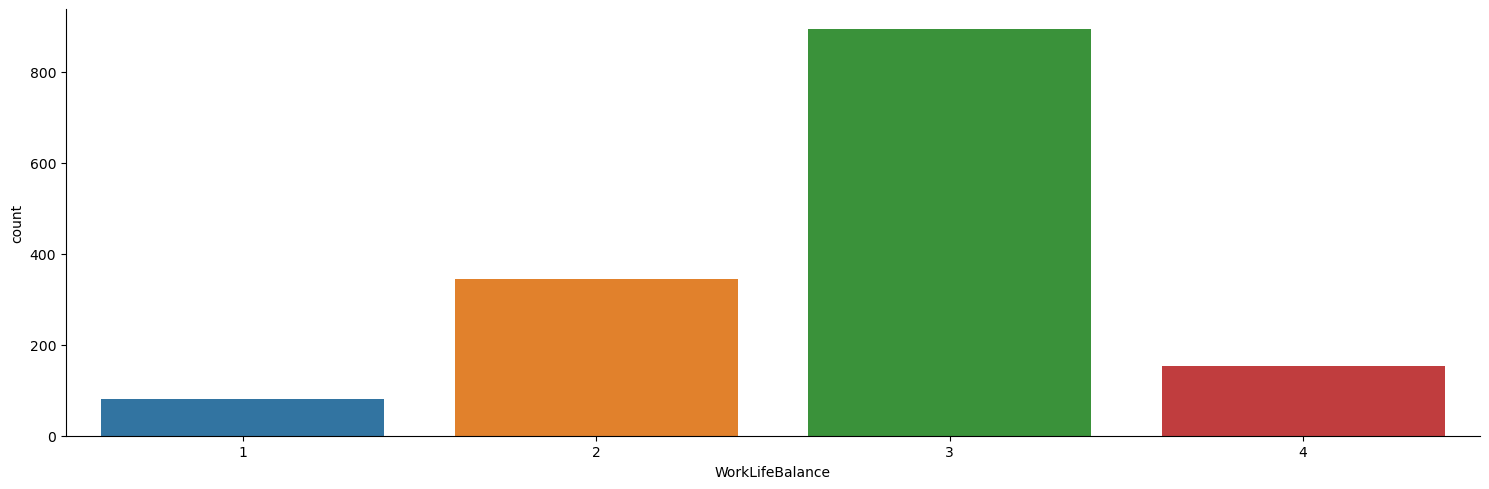

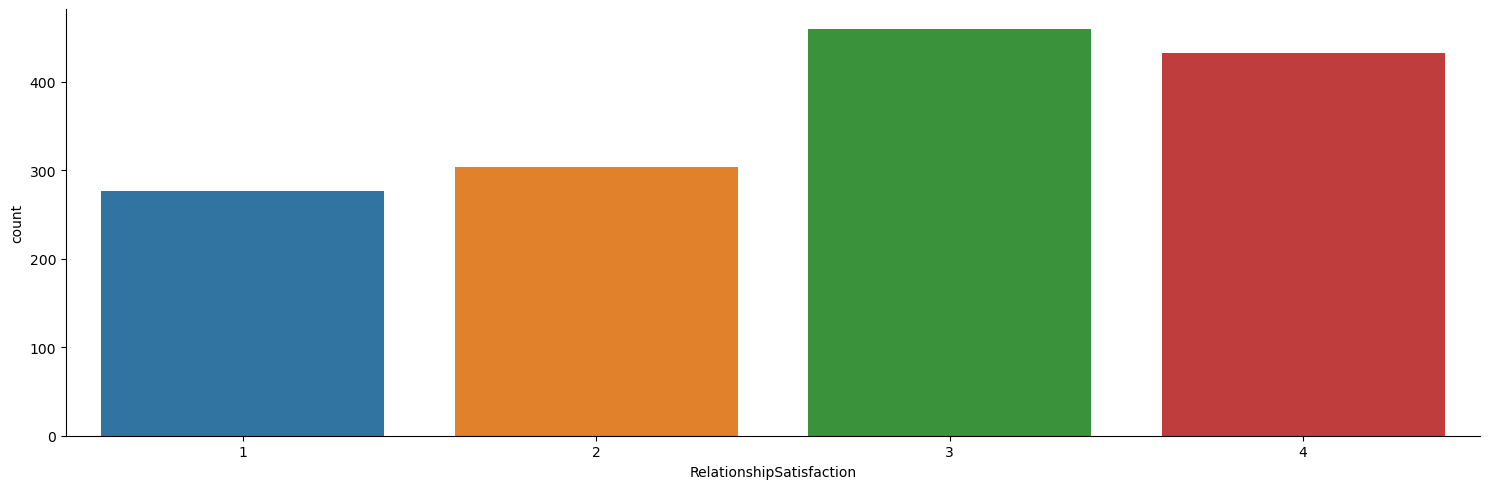

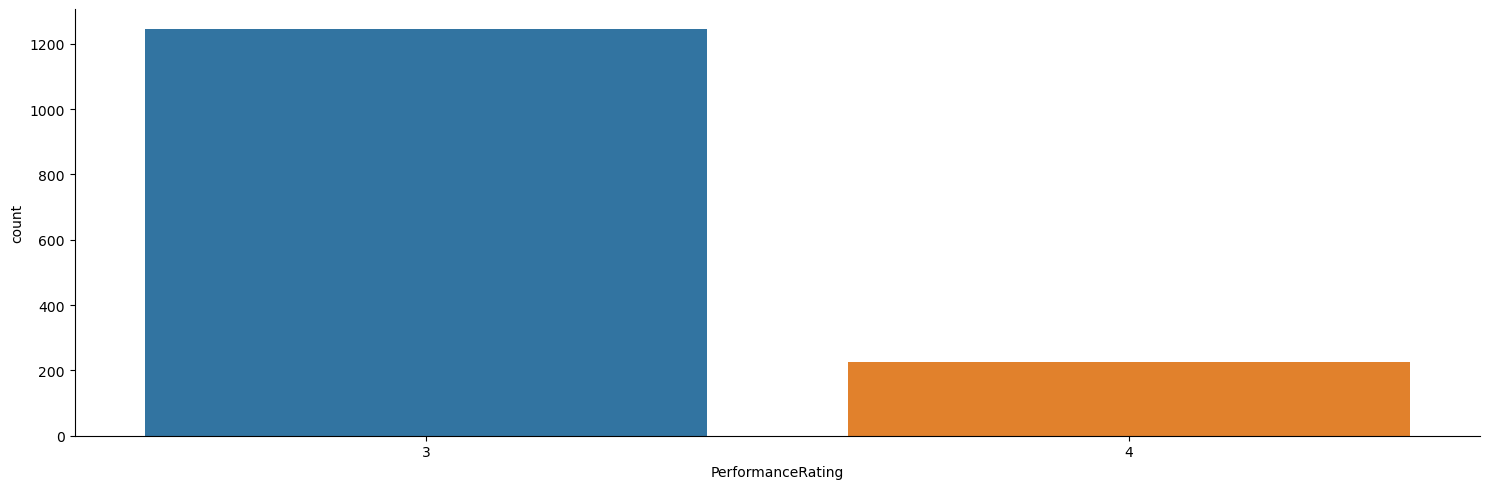

In [29]:
num_disc=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']
for i in num_disc:
    plot_cat(i)



# 2. Correlation b/w features

<Axes: >

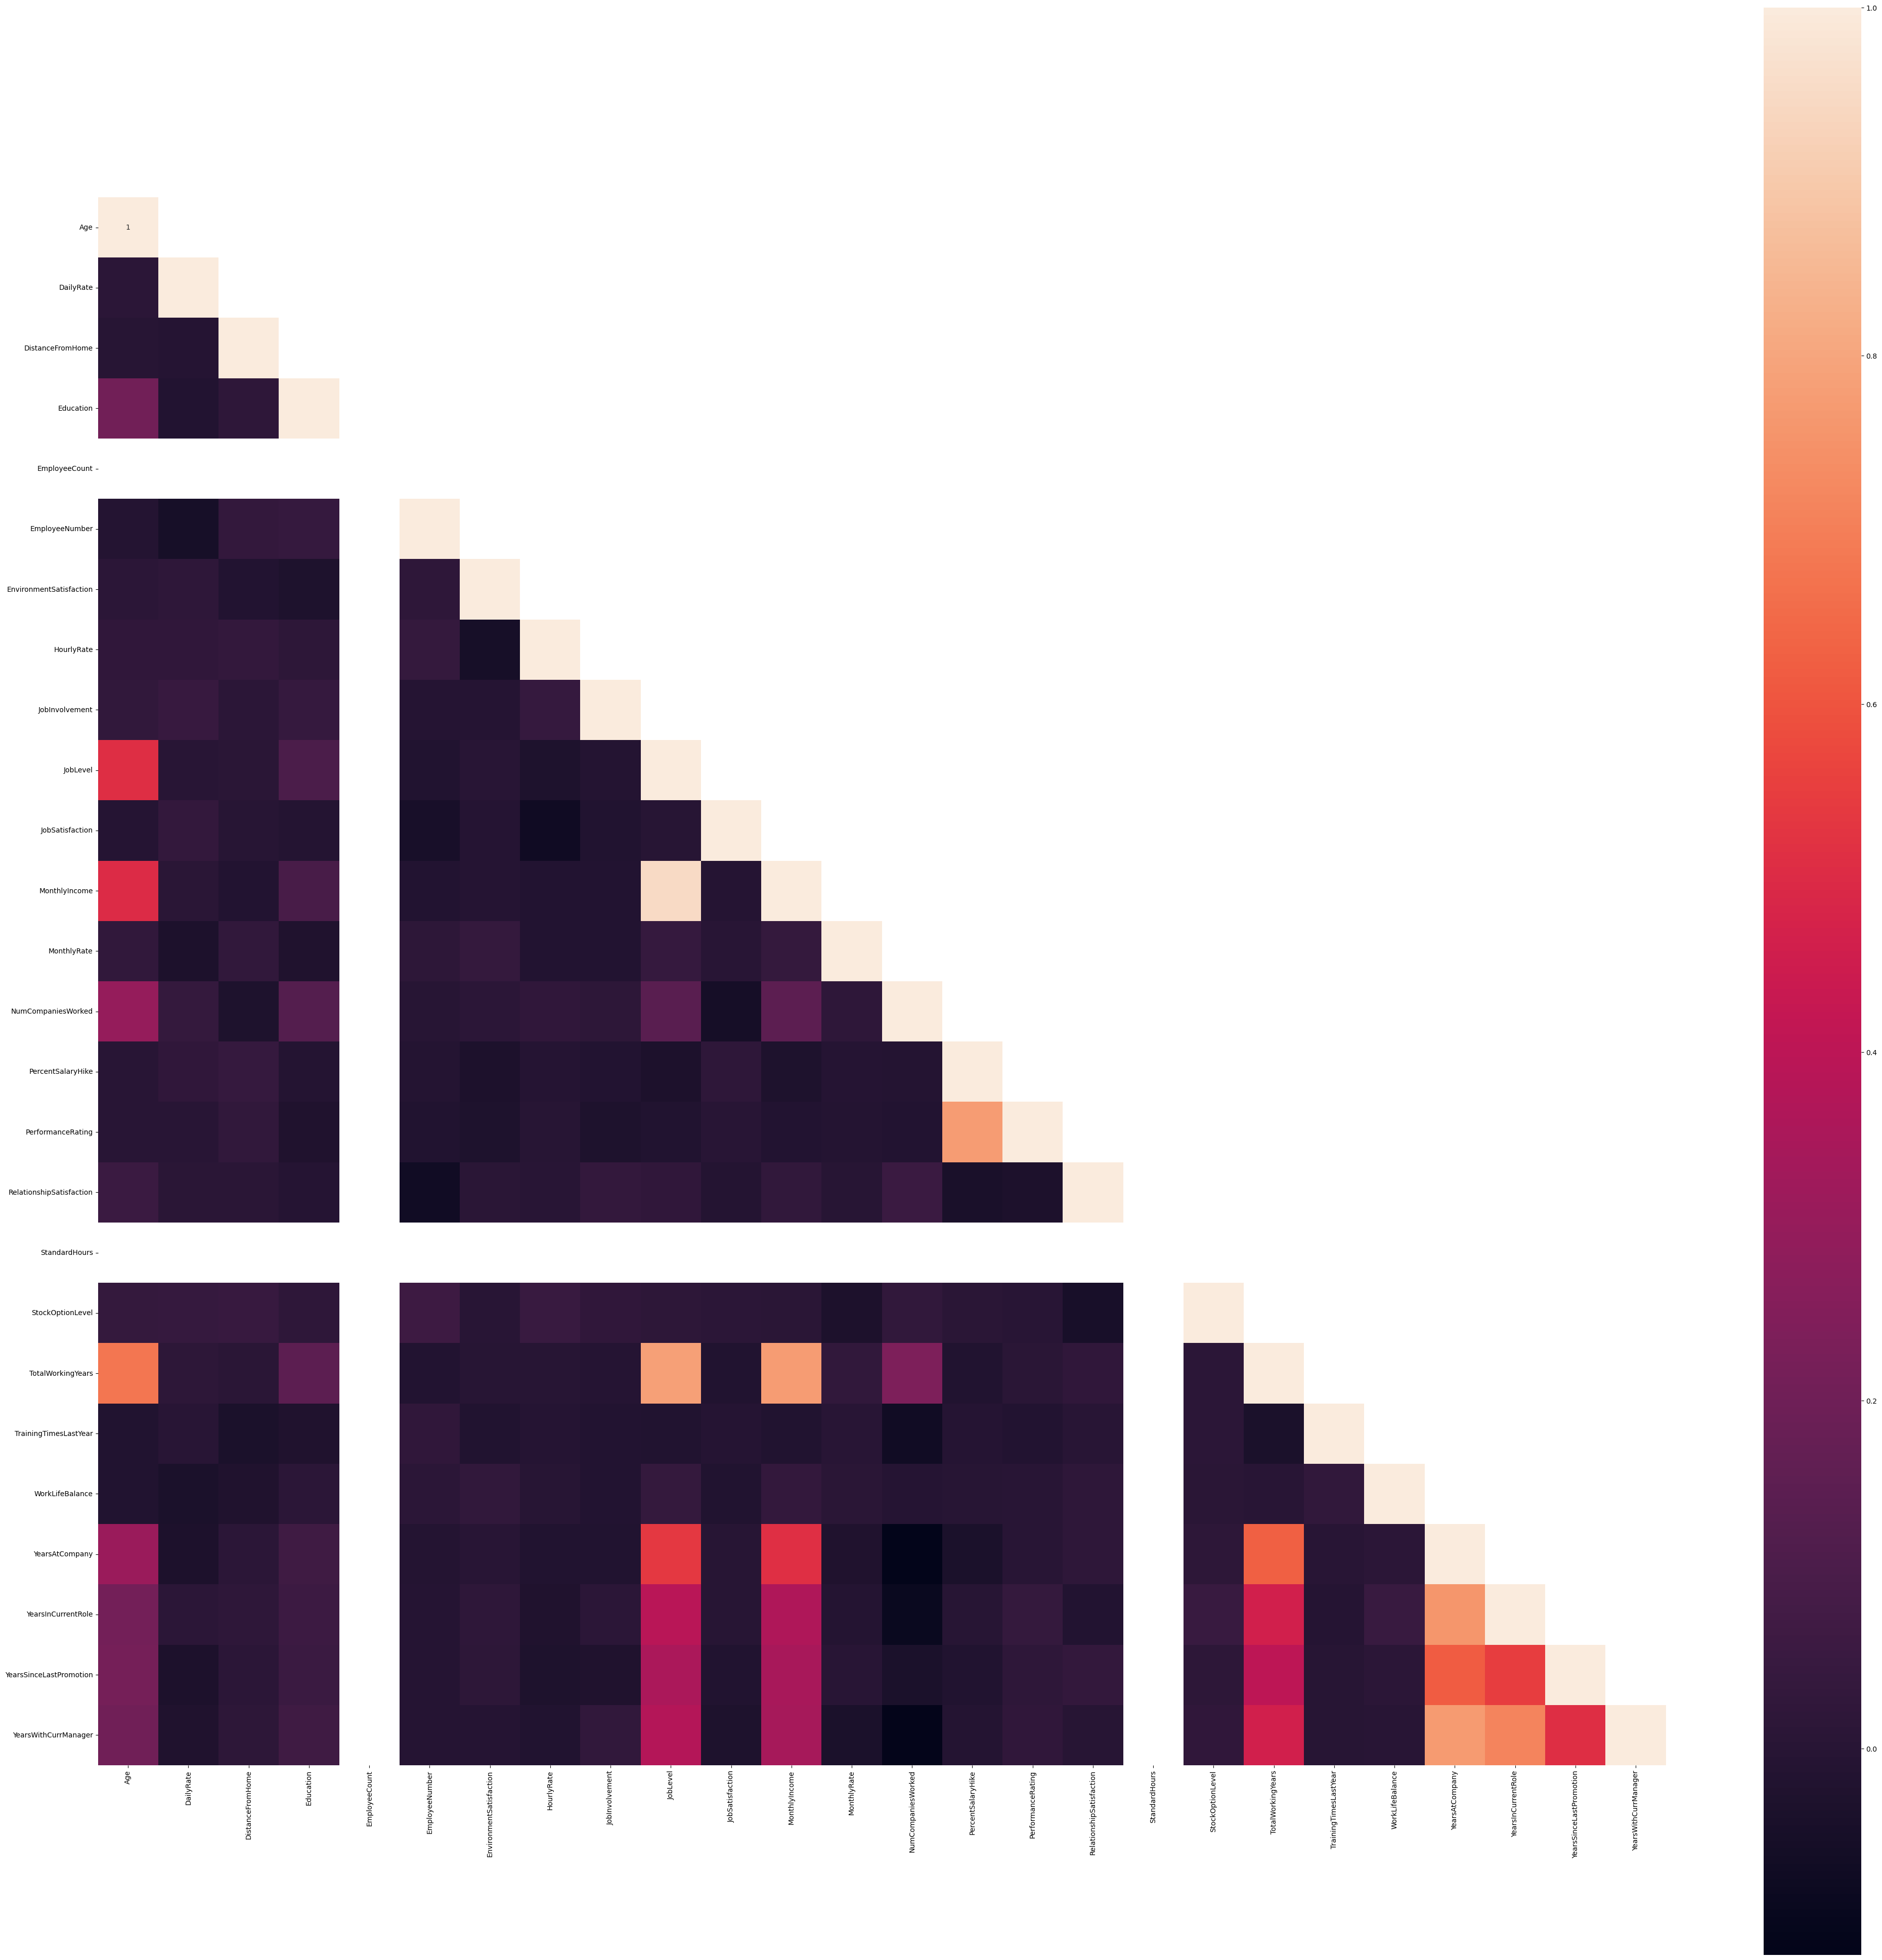

In [30]:
import numpy as np
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
cor_mat = numeric_df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(50,50)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)





In [31]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 3. Feature Selection

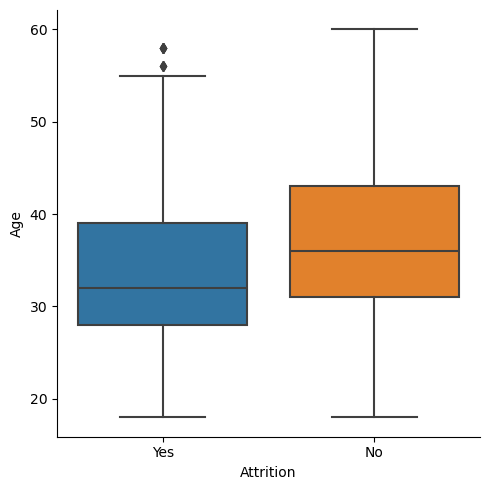

In [32]:
sns.catplot(data=df,y='Age',x='Attrition',height=5,aspect=1,kind='box')


In [33]:
df.Department.value_counts()


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

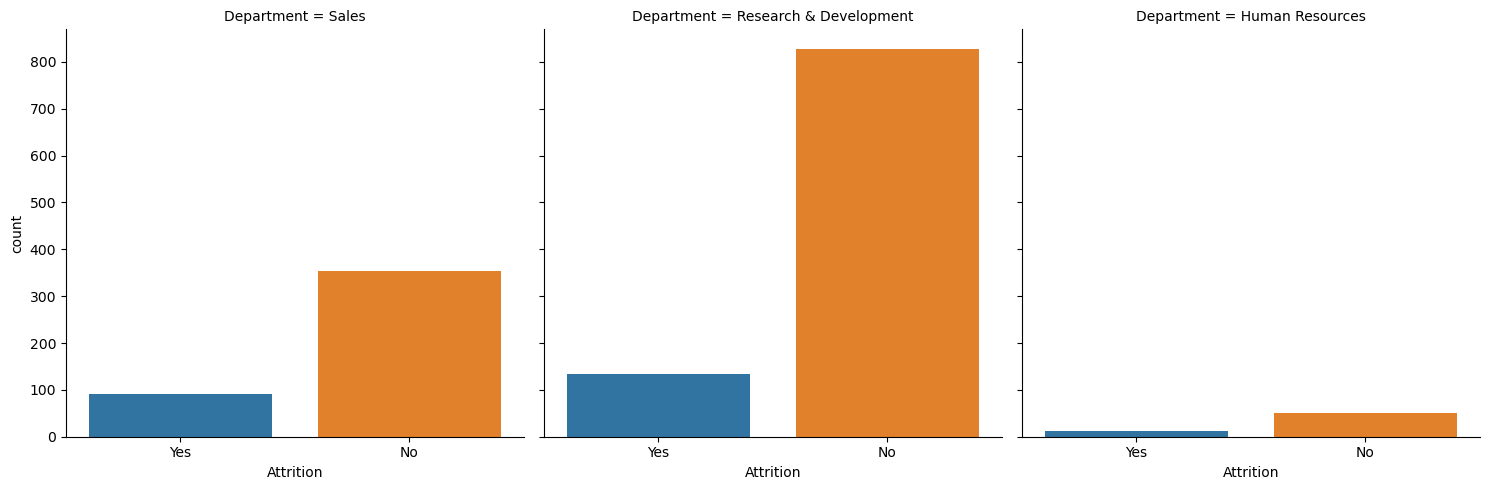

In [34]:
sns.catplot(data=df,kind='count',x='Attrition',col='Department')


In [35]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


In [36]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


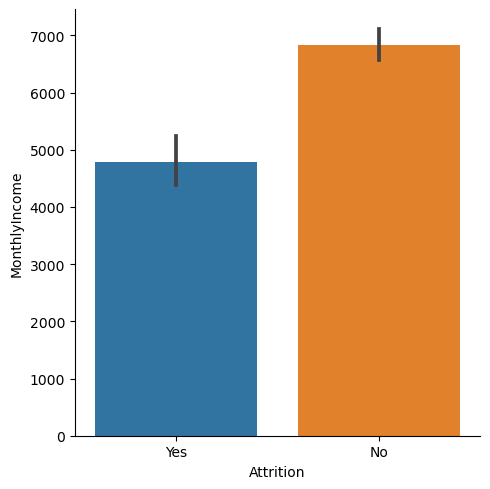

In [37]:
sns.catplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')


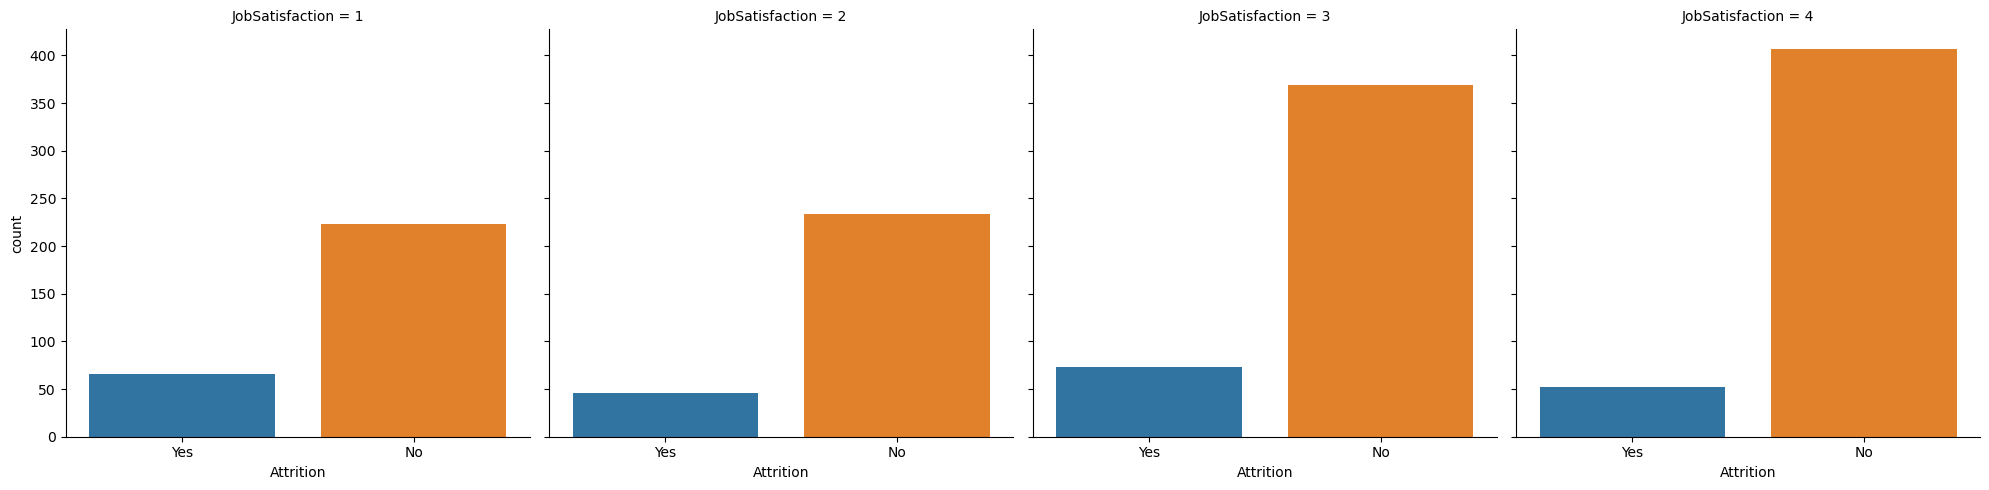

In [38]:
sns.catplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')


In [39]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


In [40]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [41]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


In [42]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


In [43]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


In [44]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

# 4. Preparing dataset

In [45]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)
    

In [46]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [47]:

from sklearn.preprocessing import LabelEncoder

# Assuming cat_df is your DataFrame containing categorical variables

for col in cat_df.columns:
    le = LabelEncoder()
    cat_df[col] = le.fit_transform(cat_df[col])


In [48]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,1,2,Life Sciences,2,Female,3,2,...,Yes,11,3,1,8,1,6,4,0,5
1,49,No,Research & Development,8,1,Life Sciences,3,Male,2,2,...,No,23,4,4,10,3,10,7,1,7
2,37,Yes,Research & Development,2,2,Other,4,Male,2,1,...,Yes,15,3,2,7,3,0,0,0,0
3,33,No,Research & Development,3,4,Life Sciences,4,Female,3,1,...,Yes,11,3,3,8,3,8,7,3,0
4,27,No,Research & Development,2,1,Medical,1,Male,3,1,...,No,12,3,4,6,3,2,2,2,2


In [49]:
# Assuming 'df' is your DataFrame
from sklearn.preprocessing import StandardScaler

# Identify columns to scale (excluding 'Sales' and 'Attrition')
numeric_columns = [col for col in df.columns if df[col].dtype != object and col != 'Attrition']

# Check if "Sales" can be converted to numeric (e.g., if it represents numbers as strings)
try:
  df['Sales'] = pd.to_numeric(df['Sales'])
except:
  # Handle the case where conversion fails (e.g., if "Sales" contains text)
  print("Sales column could not be converted to numeric. Consider excluding it or using a different preprocessing technique.")

# Create the StandardScaler object
scaler = StandardScaler()

# Scale the DataFrame excluding the 'Attrition' column
scaled_df = scaler.fit_transform(df[numeric_columns])

# Separate the scaled data (X) and target variable (Y)
X = scaled_df
Y = df['Attrition'].to_numpy()  # Use to_numpy() instead of as_matrix()



Y


Sales column could not be converted to numeric. Consider excluding it or using a different preprocessing technique.


array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [50]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming Y is a pandas Series or NumPy array
le = LabelEncoder()


Y = le.fit_transform(Y)

Y = to_categorical(Y)

print(le.classes_)
Y




['No' 'Yes']


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [51]:
from sklearn.model_selection import train_test_split

# Now you can use train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

# 5. Making predictions using Artificial Neural Network

In [52]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
oversampler = SMOTE(random_state=42)

# Use SMOTE for over-sampling
x_train_smote, y_train_smote = oversampler.fit_resample(x_train, y_train)



In [53]:
np.random.seed(42)

In [54]:
import random as rn
rn.seed(42)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(input_dim=23,units=8,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=2,activation='sigmoid'))

In [56]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])



In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 192       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 370 (1.45 KB)
Trainable params: 370 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Example preprocessing to add additional features (zeros in this case) to match the expected input shape
additional_features_train = np.zeros((x_train.shape[0], 6))  # Adding 6 additional features to make a total of 23 features
additional_features_test = np.zeros((x_test.shape[0], 6))

x_train_corrected = np.concatenate((x_train, additional_features_train), axis=1)
x_test_corrected = np.concatenate((x_test, additional_features_test), axis=1)

# Now x_train_corrected and x_test_corrected have the correct shape (None, 23) expected by the model

# Define your model
model = Sequential()
model.add(Dense(input_dim=23, units=8, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

# Compile the model using the Adam optimizer with learning_rate argument
optimizer = Adam(learning_rate=0.01)  # Use the Adam optimizer with a learning rate of 0.01
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
History = model.fit(x_train_corrected, y_train, validation_data=(x_test_corrected, y_test), epochs=10, verbose=1)


Epoch 1/10


35/35 [==============================] - 5s 39ms/step - loss: 0.5249 - accuracy: 0.7849 - val_loss: 0.3703 - val_accuracy: 0.8696
Epoch 2/10
35/35 [==============================] - 0s 8ms/step - loss: 0.4330 - accuracy: 0.8285 - val_loss: 0.3642 - val_accuracy: 0.8696
Epoch 3/10
35/35 [==============================] - 0s 8ms/step - loss: 0.4139 - accuracy: 0.8285 - val_loss: 0.3549 - val_accuracy: 0.8696
Epoch 4/10
35/35 [==============================] - 0s 7ms/step - loss: 0.4008 - accuracy: 0.8339 - val_loss: 0.3564 - val_accuracy: 0.8696
Epoch 5/10
35/35 [==============================] - 0s 7ms/step - loss: 0.3884 - accuracy: 0.8448 - val_loss: 0.3414 - val_accuracy: 0.8750
Epoch 6/10
35/35 [==============================] - 0s 7ms/step - loss: 0.3837 - accuracy: 0.8403 - val_loss: 0.3507 - val_accuracy: 0.8696
Epoch 7/10
35/35 [==============================] - 0s 8ms/step - loss: 0.3829 - accuracy: 0.8330 - val_loss: 0.3470 - val_accuracy: 0.8750
Epoch 8/10
35/35 

In [59]:
import numpy as np

# Example preprocessing to add additional features (zeros in this case) to match the expected input shape
additional_features_test = np.zeros((x_test.shape[0], 6))  # Adding 6 additional features to make a total of 23 features
x_test_corrected = np.concatenate((x_test, additional_features_test), axis=1)

# Now x_test_corrected has the correct shape (None, 23) expected by the model

# Predict probabilities for each class
y_pred_prob = model.predict(x_test_corrected)

# For binary classification
# Apply thresholding to get the predicted classes
y_pred_classes = (y_pred_prob > 0.5).astype(int)

# For multi-class classification
# Use argmax to get the predicted classes
# y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Now y_pred_classes contains the predicted class labels



12/12 [==============================] - 0s 4ms/step


In [60]:
import numpy as np

# Example preprocessing to add additional features (zeros in this case) to match the expected input shape
additional_features_test = np.zeros((x_test.shape[0], 6))  # Adding 6 additional features to make a total of 23 features
x_test_corrected = np.concatenate((x_test, additional_features_test), axis=1)

# Now x_test_corrected has the correct shape (None, 23) expected by the model

# Predict probabilities for each class
y_pred_prob = model.predict(x_test_corrected)

# Now y_pred_prob contains the predicted probabilities for each class for each sample in x_test_corrected


12/12 [==============================] - 0s 4ms/step


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Reset TensorFlow graph
tf.keras.backend.clear_session()

# Example preprocessing to add additional features (zeros in this case) to match the expected input shape
additional_features_test = np.zeros((x_test.shape[0], 6))  # Adding 6 additional features to make a total of 23 features
x_test_corrected = np.concatenate((x_test, additional_features_test), axis=1)

# Recreate and compile the model
model = Sequential([
    Dense(input_dim=23, units=8, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=2, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model with the corrected input data
evaluation_result = model.evaluate(x_test_corrected, y_test)

# Print the evaluation metrics
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])






12/12 [==============================] - 1s 4ms/step - loss: 0.6730 - accuracy: 0.6793
Test Loss: 0.6729526519775391
Test Accuracy: 0.679347813129425


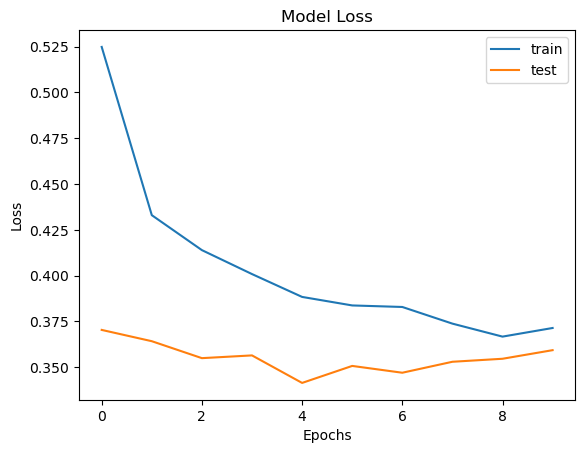

In [62]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

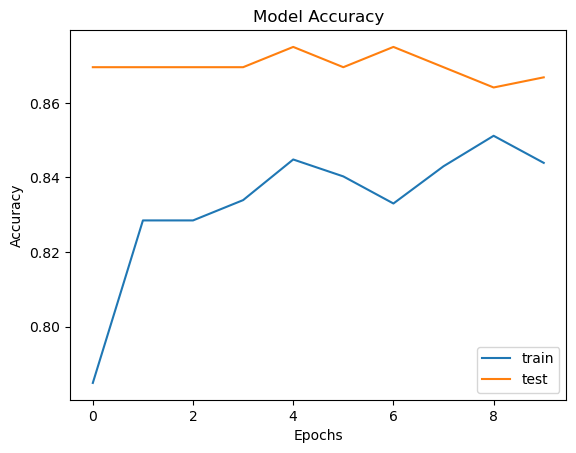

In [63]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


In [64]:
# Predict probabilities for each class
y_pred_prob = model.predict(x_test_corrected)

# Apply thresholding to get the predicted classes
predicted_labels = (y_pred_prob > 0.5).astype(int)

# Display predicted class labels
print("Predicted class labels:")
print(predicted_labels)



12/12 [==============================] - 0s 4ms/step
Predicted class labels:
[[1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your model architecture
def create_model(input_dim):
    model = Sequential([
        Dense(32, activation='relu', input_dim=input_dim),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    return model

# Instantiate the model
model = create_model(input_dim=x_train_corrected.shape[1])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])





In [66]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test are the original labels (not encoded)
# Assuming x_train_corrected, x_test_corrected, y_train, and y_test are defined correctly

# Convert y_train and y_test to 1D arrays
y_train = y_train[:, 0]  # Assuming the labels are in the first column
y_test = y_test[:, 0]    # Assuming the labels are in the first column

# Encode the labels for binary classification
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define and compile the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(23,)),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(x_train_corrected, y_train_encoded, validation_data=(x_test_corrected, y_test_encoded), epochs=50, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on test data
evaluation_result = model.evaluate(x_test_corrected, y_test_encoded)
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])




Epoch 1/50
35/35 [==============================] - 3s 20ms/step - loss: 0.5266 - accuracy: 0.7886 - val_loss: 0.4256 - val_accuracy: 0.8723
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.4619 - accuracy: 0.8294 - val_loss: 0.3927 - val_accuracy: 0.8696
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 0.4413 - accuracy: 0.8285 - val_loss: 0.3816 - val_accuracy: 0.8696
Epoch 4/50
35/35 [==============================] - 0s 12ms/step - loss: 0.4285 - accuracy: 0.8285 - val_loss: 0.3739 - val_accuracy: 0.8723
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 0.4186 - accuracy: 0.8312 - val_loss: 0.3680 - val_accuracy: 0.8696
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 0.4096 - accuracy: 0.8312 - val_loss: 0.3657 - val_accuracy: 0.8696
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 0.4036 - accuracy: 0.8339 - val_loss: 0.3627 - val_accuracy: 0.8696
Epoch 8/50
35/35 [

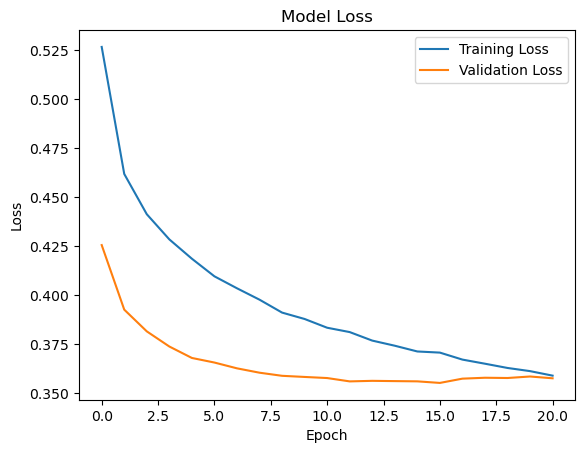

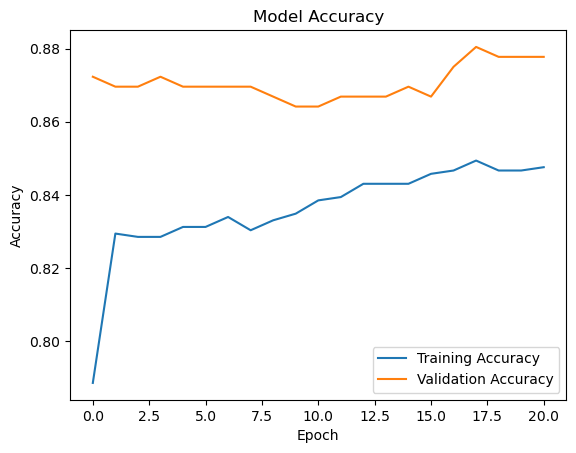

In [67]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [68]:
# Predict probabilities for the test data
predicted_probabilities = model.predict(x_test_corrected)

# Convert probabilities to class labels
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Display actual and predicted outcomes side by side
print("Actual Outcome\tPredicted Outcome")
for actual, predicted in zip(y_test_encoded, predicted_labels):
    print(actual, "\t\t", predicted)




12/12 [==============================] - 0s 4ms/step
Actual Outcome	Predicted Outcome
1 		 [1]
1 		 [1]
0 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
0 		 [1]
0 		 [1]
1 		 [1]
0 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
0 		 [1]
1 		 [1]
1 		 [1]
0 		 [0]
0 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
0 		 [1]
1 		 [1]
0 		 [1]
0 		 [1]
0 		 [1]
0 		 [0]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
0 		 [0]
0 		 [1]
1 		 [1]
0 		 [0]
0 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
0 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 [1]
1 		 